In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy import signal
from scipy import ndimage
from PIL import Image


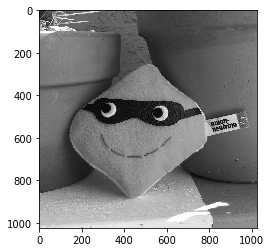

(1024, 1024)


In [2]:
img=np.array(mpimg.imread("pzooImage1.jpg"))
img = np.mean(img,axis=2)
plt.imshow(img,cmap='gray')
plt.show()
print(img.shape)

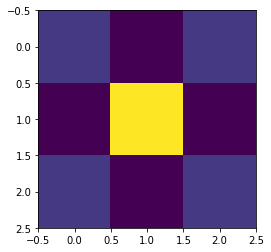

In [3]:
kernal = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
plt.imshow(kernal)
plt.show()
conv = ndimage.convolve(img,kernal,mode='constant')

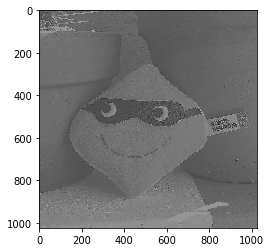

In [4]:
plt.imshow(conv,cmap='gray')
plt.show()

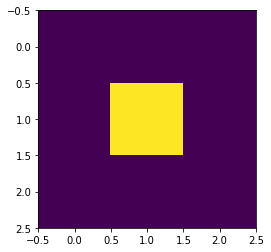

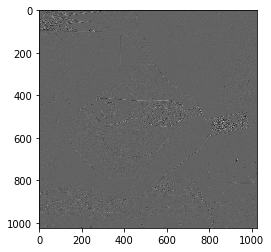

In [5]:
kernal = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
plt.imshow(kernal)
plt.show()
conv = ndimage.convolve(img,kernal,mode='constant')
plt.imshow(conv,cmap='gray')
plt.show()

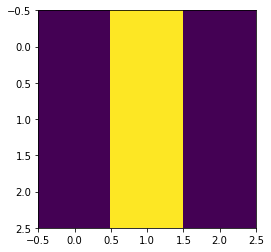

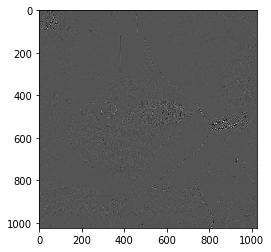

In [6]:
kernal = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]]).T
plt.imshow(kernal)
plt.show()
conv = ndimage.convolve(img,kernal,mode='constant')
plt.imshow(conv,cmap='gray')
plt.show()

In [7]:
im = Image.fromarray(conv)
im = im.convert("RGB")
im.save("convPzoo.png")

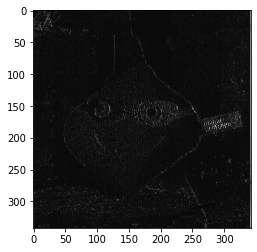

In [8]:
import skimage.measure

pool = skimage.measure.block_reduce(conv, (3,3), np.max)
plt.imshow(pool,cmap='gray')
plt.show()

In [9]:
im = Image.fromarray(pool)
im = im.convert("RGB")
im.save("poolPzoo.png")

In [10]:
im = Image.fromarray(img)
im = im.convert("RGB")
im.save("poolPzoo.png")

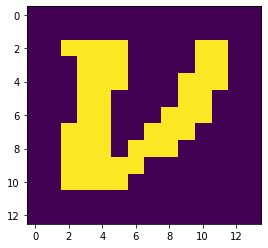

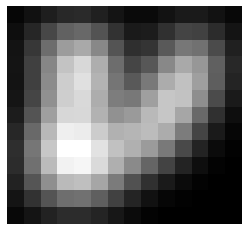

In [11]:
kernal = 1/9*np.array([[1,1,1],[1,1,1],[1,1,1]])
img=np.mean(np.array(mpimg.imread("nu_3.png")),axis=2)
img = np.pad((img>1/255).astype(float),((2,2),(2,2)),constant_values=0)
plt.imshow(img)
plt.show()
img_ = plt.imshow(img, interpolation='nearest')
img_.set_cmap('gray')
plt.axis('off')
plt.savefig("denseConv_before.png", bbox_inches='tight')
conv = ndimage.convolve(img,kernal,mode='constant')
img = plt.imshow(conv, interpolation='nearest')
img.set_cmap('gray')
plt.axis('off')
plt.savefig("denseConv.png", bbox_inches='tight')
for i in range(2):
    conv = ndimage.convolve(conv,kernal,mode='constant')
    img = plt.imshow(conv, interpolation='nearest')
    img.set_cmap('gray')
    plt.axis('off')
    plt.savefig("denseConv{}.png".format(i), bbox_inches='tight')
#     im = Image.fromarray(conv*255)#(np.max(conv)-np.min(conv))/255)
#     im = Image.fromarray(conv>0)

#     im = im.convert("RGB")
#     im.save("denseConv{}.png".format(i))
# print(conv)
# im = Image.fromarray(conv)
# im = im.convert("RGB")
# im.save("denseConv.png")

In [12]:
import torch
import sparseconvnet as scn
msgs = img
locations = []
features = []
for batchIdx, msg in enumerate(msgs):
    for y, line in enumerate(msg):
        for x, c in enumerate(line):
            if c == 'X':
                locations.append([y, x, batchIdx])
                features.append([1])

ImportError: /home/lewis/SparseConvNet/sparseconvnet/SCN.cpython-37m-x86_64-linux-gnu.so: undefined symbol: _ZN3c105ErrorC1ENS_14SourceLocationERKSs